# AutoEncoder with Linear Layers

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import torch
from torch import nn
from torch.nn import functional as F
import torchvision
from torchvision import datasets

from tqdm import tqdm

from constants import *
from model import AutoEncoder

In [9]:
mnist_trainset = datasets.MNIST(root='../../data', train=True, download=True, transform=None)
train_loader = torch.utils.data.DataLoader(mnist_trainset)
X = mnist_trainset.data

X = (X.reshape((-1, 28*28))/255).to(device)[4]
X.shape

torch.Size([784])

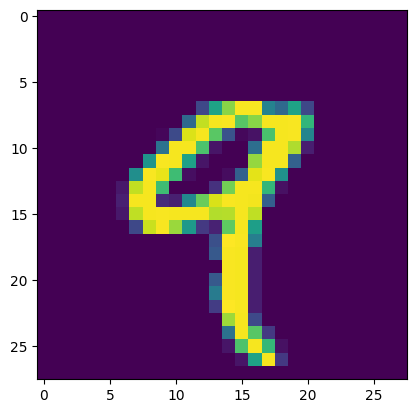

In [10]:
plt.imshow(np.array(X.cpu().reshape((28,28))))

In [11]:
m = AutoEncoder()
m.forward(X).shape

torch.Size([784])

In [12]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(m.parameters(), lr = 1e-1)

In [13]:
for i in tqdm(range(1000)):
    logits = m.forward(X)
    loss = criterion(logits, X)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if(i%500==0):
        print(loss)
print(loss)

  6%|▌         | 58/1000 [00:00<00:03, 284.96it/s]

tensor(0.2319, device='cuda:0', grad_fn=<MseLossBackward0>)


 53%|█████▎    | 533/1000 [00:01<00:01, 317.44it/s]

tensor(0.0075, device='cuda:0', grad_fn=<MseLossBackward0>)


100%|██████████| 1000/1000 [00:03<00:00, 299.74it/s]

tensor(0.0075, device='cuda:0', grad_fn=<MseLossBackward0>)


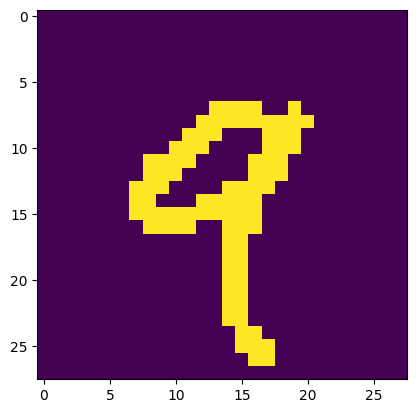

In [14]:
out = m.forward(X).reshape(28, 28).cpu().detach().numpy()
plt.imshow(out)